In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/benin-malanville.csv',parse_dates=['Timestamp'])

Summary Statistics

In [10]:
# Summary Statistics
summary_stats = df.describe()

# Median Calculation (not included in `describe`)
median_values = df.median()

print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)


Summary Statistics:
                            Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%

Data Quality Check

In [11]:
# Missing values
missing_values = df.isnull().sum()

# Negative values in irradiance columns
negative_values = {
    "GHI": (df["GHI"] < 0).sum(),
    "DNI": (df["DNI"] < 0).sum(),
    "DHI": (df["DHI"] < 0).sum(),
}

print("Missing Values:\n", missing_values)
print("\nNegative Value Counts:\n", negative_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Value Counts:
 {'GHI': np.int64(258847), 'DNI': np.int64(275987), 'DHI': np.int64(259182)}


Time Series Analysis

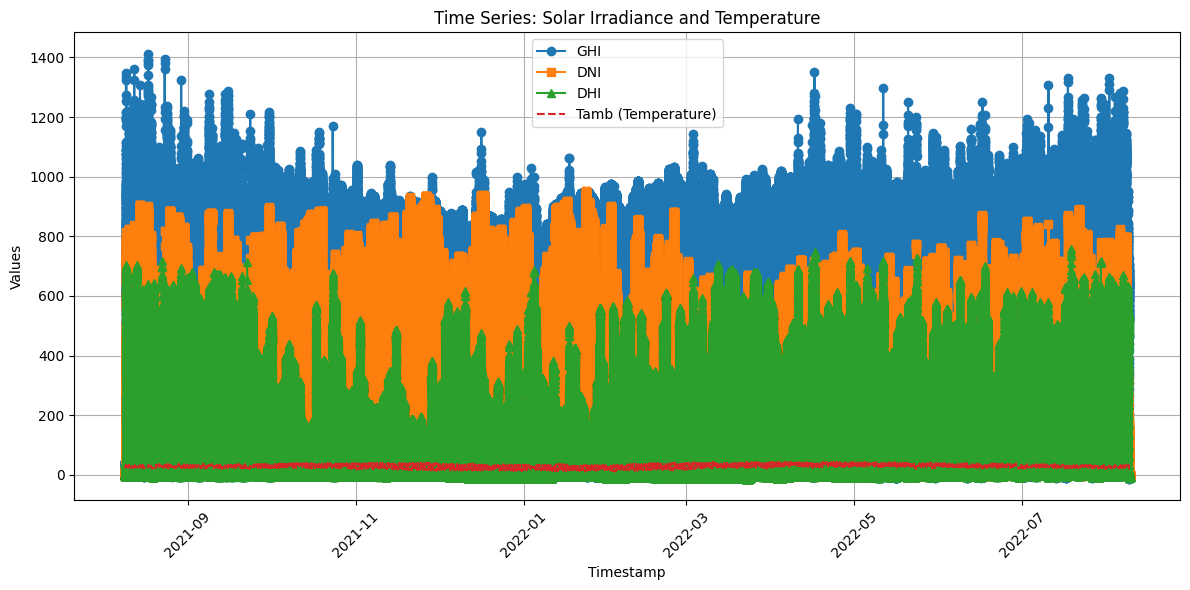

In [12]:
import matplotlib.pyplot as plt

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["GHI"], label="GHI", marker="o")
plt.plot(df["Timestamp"], df["DNI"], label="DNI", marker="s")
plt.plot(df["Timestamp"], df["DHI"], label="DHI", marker="^")
plt.plot(df["Timestamp"], df["Tamb"], label="Tamb (Temperature)", linestyle="--")
plt.title("Time Series: Solar Irradiance and Temperature")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Impact of Cleaning

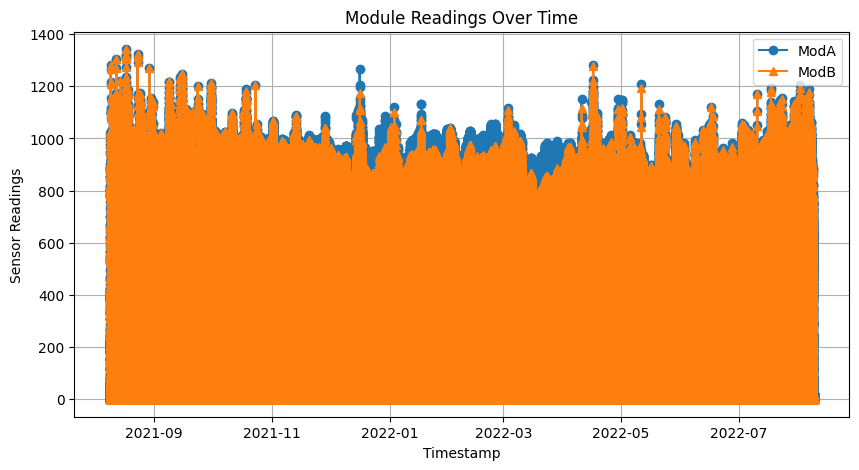

In [13]:
# Comparing ModA and ModB with Cleaning events
df_cleaning = df[df["Cleaning"] > 0]

# Plot ModA and ModB against time
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp"], df["ModA"], label="ModA", marker="o")
plt.plot(df["Timestamp"], df["ModB"], label="ModB", marker="^")
plt.title("Module Readings Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Readings")
plt.legend()
plt.grid()
plt.show()

Correlation Analysis

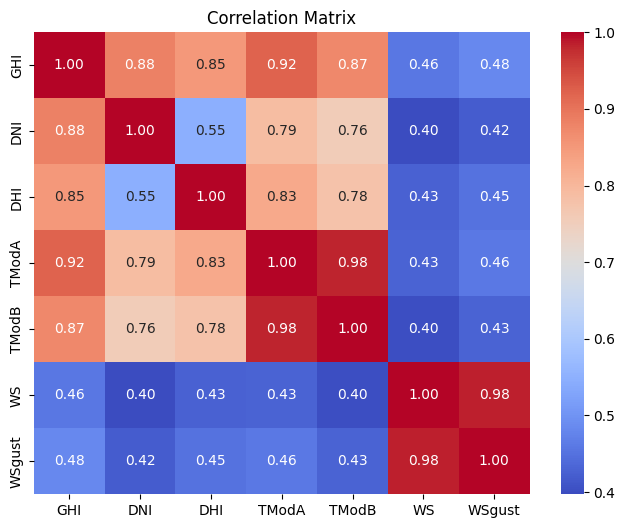

In [14]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[["GHI", "DNI", "DHI", "TModA", "TModB", "WS", "WSgust"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Wind Analysis

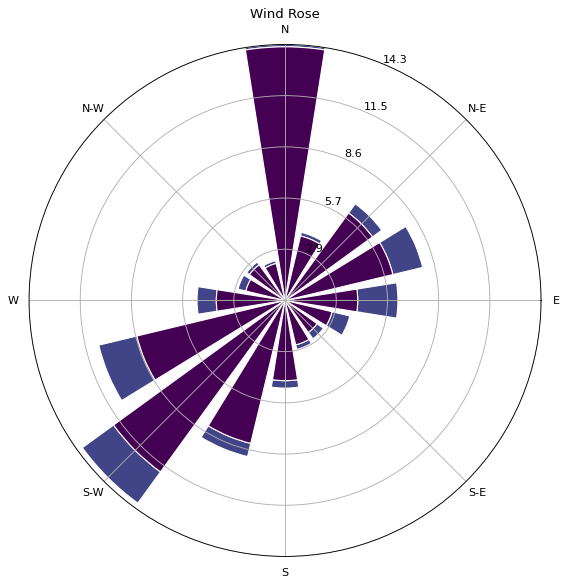

In [16]:
from windrose import WindroseAxes

# Windrose Plot
ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_title("Wind Rose")
plt.show()


Histograms

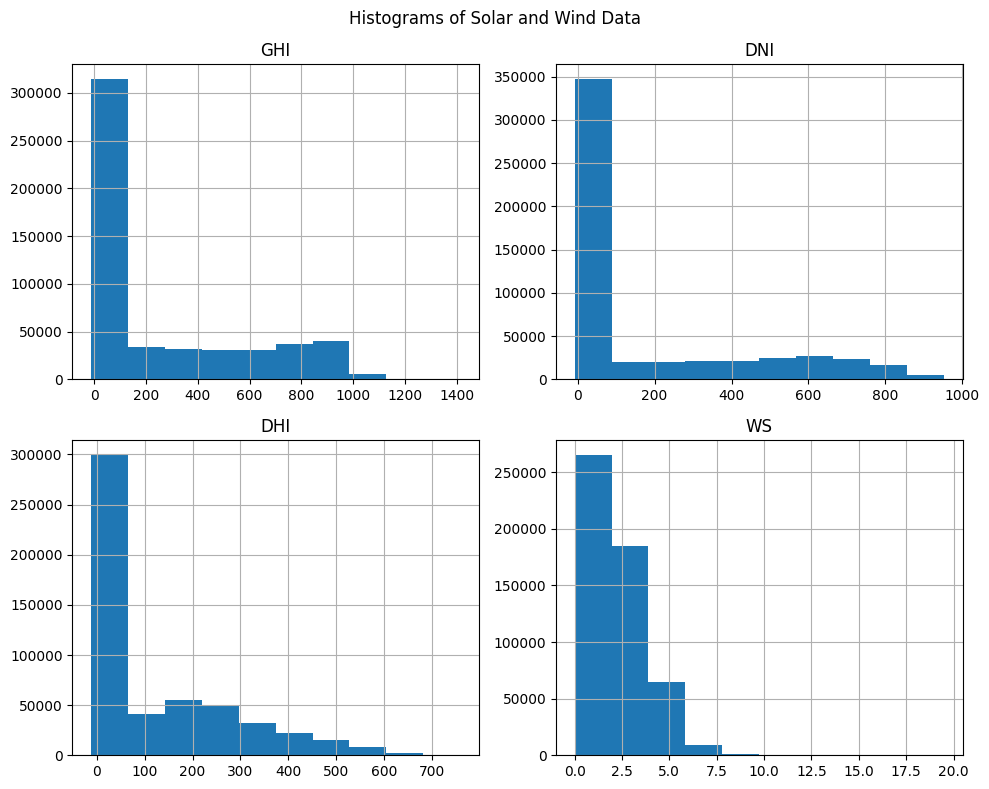

In [17]:
# Histogram for GHI, DNI, DHI, and WS
df[["GHI", "DNI", "DHI", "WS"]].hist(figsize=(10, 8), bins=10)
plt.suptitle("Histograms of Solar and Wind Data")
plt.tight_layout()
plt.show()


Z-Score Analysis

In [20]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df[["GHI", "DNI", "DHI", "Tamb"]].apply(zscore)

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outlier Rows:\n", df[outliers])


Outlier Rows:
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672    2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673    2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
524896 2022-08-08 12:17:00   933.0  321.6  604.2   873.0   869.0  30.5  73.5   
524900 2022-08-08 12:21:00   829.0  228.3  591.5   776.2   771.9  30.5  73.1   
524901 2022-08-08 12:22:00   831.0  225.8  596.1   773.8   770.2  30.5  73.0   
524916 2022-08-08 12:37:00   796.9  188.7  599.5   750.3   747.6  30.3  72.5   
524917 2022-08-08 12:38:00   743.9  143.3  593.2   703.0   700.9  30.3  72.9   

         WS  WSgust  WSs

 Bubble Chart

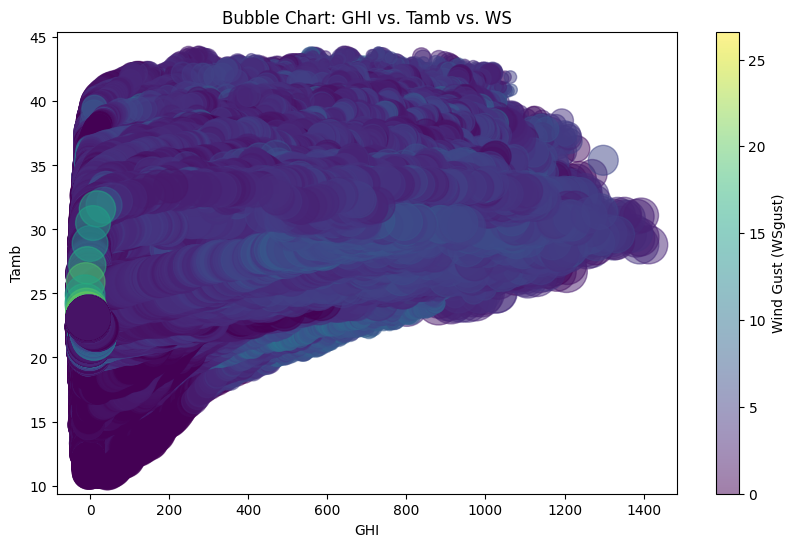

In [19]:
# Bubble chart: GHI vs. Tamb vs. WS with bubble size = RH
plt.figure(figsize=(10, 6))
plt.scatter(df["GHI"], df["Tamb"], s=df["RH"] * 10, alpha=0.5, c=df["WSgust"], cmap="viridis")
plt.colorbar(label="Wind Gust (WSgust)")
plt.title("Bubble Chart: GHI vs. Tamb vs. WS")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()
